Sistema de ecuaciones diferenciales (autovalores distintos)


![alt text](image.png)

In [6]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definir las variables simbólicas
t = sp.symbols('t')
x, y = sp.symbols('x y')

# Definir la matriz de coeficientes del sistema
A = sp.Matrix([[6, -1], [5, 2]])

# Calcular los autovalores de la matriz
eigenvalues = A.eigenvals()

# Obtener el primer autovalor
lambda_val = list(eigenvalues.keys())[0]

# Definir las variables para el autovector
k1, k2 = sp.symbols('k1 k2')

# Calcular la matriz (A - λI) para el primer autovalor
A_lambda_I = A - lambda_val * sp.eye(2)
#print(f"Para λ = {lambda_val}:")
#print("Matriz (A - λI):")
sp.pprint(A_lambda_I)

# Resolver el sistema para obtener el autovector
eq1 = A_lambda_I[0, 0] * k1 + A_lambda_I[0, 1] * k2
eq2 = A_lambda_I[1, 0] * k1 + A_lambda_I[1, 1] * k2
solution = sp.solve([eq1, eq2], (k1, k2), dict=True)

# Obtener el autovector (k1, k2)
if solution:
    k1_value = solution[0].get(k1, 1)
    k2_value = solution[0].get(k2, 0)
else:
    k1_value = 1
    k2_value = 0  # En caso de que no haya solución específica

# Mostrar el autovector
print(f"Autovector K: k1 = {k1_value}, k2 = {k2_value}\n")

# Mostrar el autovalor
print(f"Autovalor λ: {lambda_val}")

# Definir las constantes c1 y c2
c1, c2 = sp.symbols('c1 c2')

# Expresar X1(t) y X2(t) sin descomponer el autovalor
X1 = f"X1(t) = {k1_value} * e^({lambda_val} * t)"
X2 = f"X2(t) = {k2_value} * e^({lambda_val} * t)"

print("Solución general en el formato solicitado:")
print(X1)
print(X2)




# Analizar estabilidad
print("\nAnálisis de estabilidad:")
stable = True
real_part = sp.re(lambda_val)  # Obtener la parte real del autovalor
if real_part >= 0:  # Evaluar la estabilidad usando solo la parte real
    stable = False

if stable:
    print("El sistema es estable (la parte real del autovalor es negativa).")
else:
    print("El sistema es inestable (la parte real del autovalor es positiva).")




⎡2 + ⅈ    -1  ⎤
⎢             ⎥
⎣  5    -2 + ⅈ⎦
Autovector K: k1 = k2*(2/5 - I/5), k2 = 0

Autovalor λ: 4 - I
Solución general en el formato solicitado:
X1(t) = k2*(2/5 - I/5) * e^(4 - I * t)
X2(t) = 0 * e^(4 - I * t)

Análisis de estabilidad:
El sistema es inestable (la parte real del autovalor es positiva).


Grafica del ejericicio
grafico de los campos vectoriales asociados y de las funciones solucion

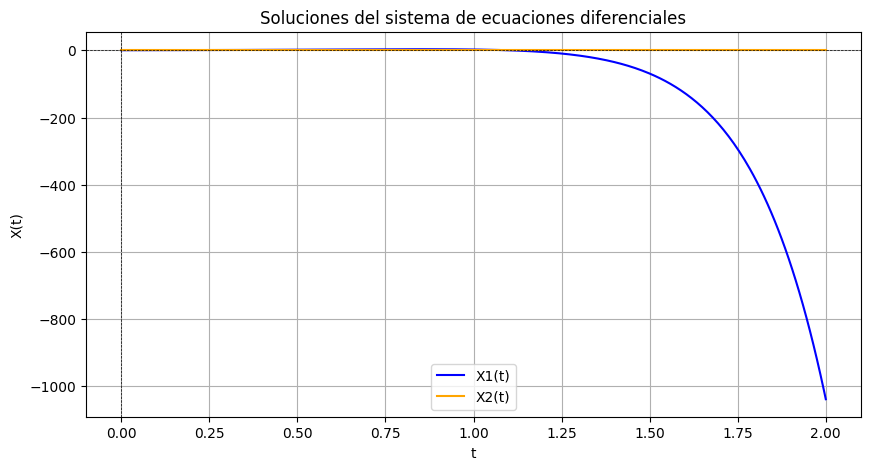

In [ ]:
# grafico de los campos vectoriales asociados y de las funciones solucion

k1_value = (2/5) - sp.I/5
a = 4  # Parte real del autovalor
b = -1  # Parte imaginaria del autovalor
B1 = k1_value  # Valor de k1 (autovector)
B2 = 0  # Valor de k2 (autovector)


B1_real = B1.as_real_imag()[0]
B1_imag = B1.as_real_imag()[1]
B2_real = B2
B2_imag = 0


def X1(t):
    return (B1_real * np.cos(b * t) - B1_imag * np.sin(b * t)) * np.exp(a * t)

def X2(t):
    return (B2_real * np.cos(b * t) + B2_imag * np.sin(b * t)) * np.exp(a * t)


t_values = np.linspace(0, 2, 400)


X1_values = X1(t_values)
X2_values = X2(t_values)

# Graficar las soluciones
plt.figure(figsize=(10, 5))
plt.plot(t_values, X1_values, label='X1(t)', color='blue')
plt.plot(t_values, X2_values, label='X2(t)', color='orange')
plt.title('Soluciones del sistema de ecuaciones diferenciales')
plt.xlabel('t')
plt.ylabel('X(t)')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.grid()
plt.legend()
plt.show()